In [10]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from pprint import pprint


In [9]:
data_dir = r"C:\Users\yrliu98\Desktop\2025_04_04_Cyerene_test"

txt_files = list(Path(data_dir).glob('*.txt'))

pprint(txt_files)

[WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_100C_front.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_CB_back.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_CB_front.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_RT_front.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/rac_ACN_front.txt')]


In [10]:
dfs = []
for txt_file in txt_files:
    df = pd.read_csv(txt_file, sep="\t", names=["wavelength", "CD", "HT", "abs"], skiprows=21, nrows=400)
    dfs.append({"name": txt_file.stem, **df.to_dict(orient='list'), "df":df })

double_side_samples = [df['df'] for df in dfs if ("Cyrene_CB_" in df["name"])]

genuine_df = double_side_samples[0].merge(double_side_samples[1], on="wavelength")

genuine_df["genuine_CD"] = (genuine_df["CD_x"] + genuine_df["CD_y"]) / 2

genuine_df["avg_abs"] = (genuine_df["abs_x"] + genuine_df["abs_y"]) / 2

to_exclude = [0, 1, 2, 3]

for i in sorted(to_exclude, reverse=True):
    dfs.pop(i)

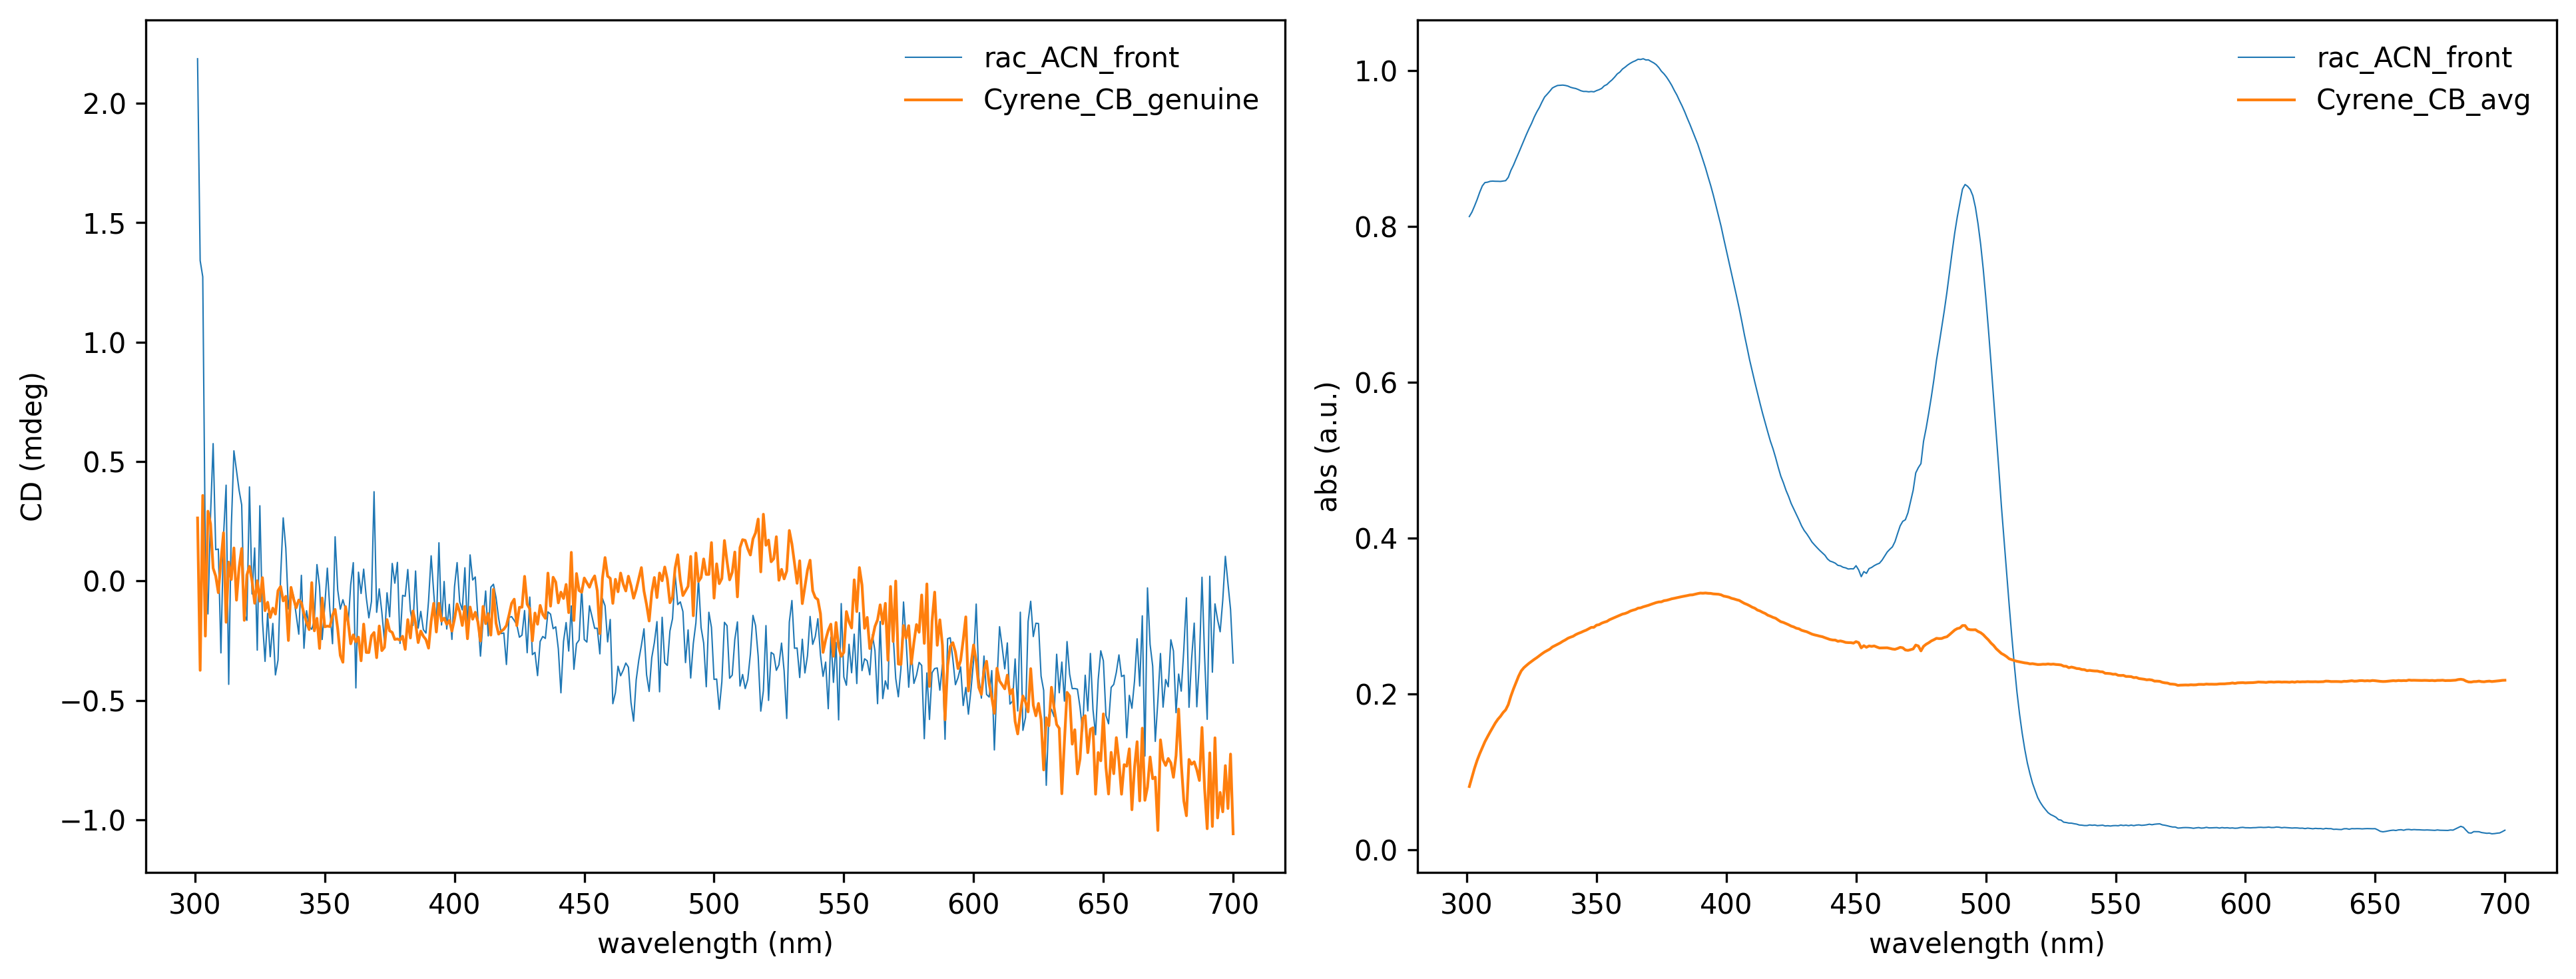

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5), dpi=300, layout="tight")

for df in dfs:
    axs[0].plot(df["wavelength"], df["CD"], label=df["name"], lw=0.5)

axs[0].plot(genuine_df["wavelength"], genuine_df["genuine_CD"], label="Cyrene_CB_genuine", lw=1)

handles, labels = axs[0].get_legend_handles_labels()
order = [4, 0, 3, 2, 1, 5]
if len(order) == len(dfs):
    axs[0].legend([handles[idx] for idx in order], [labels[idx] for idx in order], frameon=False)
else:
    axs[0].legend(frameon=False)

axs[0].set_xlabel("wavelength (nm)")
axs[0].set_ylabel("CD (mdeg)")

for df in dfs:
    axs[1].plot(df["wavelength"], df["abs"], label=df["name"], lw=0.5)
    

axs[1].plot(genuine_df["wavelength"], genuine_df["avg_abs"], label="Cyrene_CB_avg", lw=1)

axs[1].legend(frameon=False)
axs[1].set_xlabel("wavelength (nm)")
axs[1].set_ylabel("abs (a.u.)")
# axs[1].set_yscale("log")

fig.savefig(Path(data_dir, "ACN_CB_plot.jpg"))


In [3]:
data_dir = Path(r"G:\My Drive\CD\20250702_S_MeOMBAI")

txt_files = sorted(list(Path(data_dir).glob('*.csv')))

pprint(txt_files)

[WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-1.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-2.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-3.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-4.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-5.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-6.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-7.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-1.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-2.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-3.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-4.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-5.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-6.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_

In [4]:
dfs = []
common_cols = set()
for txt_file in txt_files:
    
    if "front" in txt_file.stem:
        get_col = lambda col: f"front_{col}_{txt_file.stem.replace('_front', '')}"
    elif "back" in txt_file.stem:
        get_col = lambda col: f"back_{col}_{txt_file.stem.replace('_back', '')}"
    else:
        raise ValueError(f"File {txt_file} does not contain 'front' or 'back' in its name.")
    
    common_cols.add(txt_file.stem.replace("_front", "").replace("_back", ""))
    
    df = pd.read_csv(txt_file, sep=",", names=["wavelength", get_col("CD"), get_col("HT"), get_col("abs")], skiprows=21, nrows=400)
    df = df.set_index("wavelength")
    df = df[df.index < 550]
    # df = df[df.index > 470]
    dfs.append(df)

df = pd.concat(dfs, axis=1)

for common_col in sorted(common_cols):
    df[f"gen_CD_{common_col}"] = (df[f"front_CD_{common_col}"] + df[f"back_CD_{common_col}"]) / 2
    df[f"ldlb_CD_{common_col}"] = df[f"front_CD_{common_col}"] - df[f"back_CD_{common_col}"]
    df[f"abs_{common_col}"] = (df[f"front_abs_{common_col}"] + df[f"back_abs_{common_col}"]) / 2
    df[f"g_factor_{common_col}"] = df[f"gen_CD_{common_col}"] / (df[f"abs_{common_col}"] * 32980)


df.head()

back_CD_S_MeOMBAI-1  back_HT_S_MeOMBAI-1  back_abs_S_MeOMBAI-1  \
wavelength                                                                   
549.0                   1.36561              311.168              0.436532   
548.0                   1.24446              310.232              0.436583   
547.0                   1.52933              310.046              0.436375   
546.0                   1.39126              309.666              0.435586   
545.0                   1.13269              308.660              0.436615   

            back_CD_S_MeOMBAI-2  back_HT_S_MeOMBAI-2  back_abs_S_MeOMBAI-2  \
wavelength                                                                   
549.0                 -0.747938              279.905              0.100456   
548.0                 -0.944463              279.164              0.101989   
547.0                 -0.892974              279.090              0.102888   
546.0                 -0.891158              278.799              0.102816   
545.0                 -1.126680              277.939              0.104542   

            back_CD_S_MeOMBAI-3  back_HT_S_MeOMBAI-3  back_abs_S_MeOMBAI-3  \
wavelength                                                                   
549.0                  1.131530              311.896              0.444085   
548.0                  0.893760              311.050              0.445087   
547.0                  1.215420              310.852              0.444753   
546.0                  0.880066              310.496              0.444224   
545.0                  0.811428              309.445              0.444798   

            back_CD_S_MeOMBAI-4  ...  abs_S_MeOMBAI-5  g_factor_S_MeOMBAI-5  \
wavelength                       ...                                          
549.0                  0.957951  ...         0.122628             -0.000528   
548.0                  0.853854  ...         0.125368             -0.000549   
547.0                  0.780329  ...         0.127097             -0.000524   
546.0                  0.613453  ...         0.129083             -0.000623   
545.0                  0.635047  ...         0.132566             -0.000555   

            gen_CD_S_MeOMBAI-6  ldlb_CD_S_MeOMBAI-6  abs_S_MeOMBAI-6  \
wavelength                                                             
549.0                -2.656095              1.04705         0.118045   
548.0                -2.789820              1.03090         0.120816   
547.0                -2.910390              0.82852         0.122173   
546.0                -2.956875              0.84739         0.124138   
545.0                -3.055810              1.04050         0.127023   

            g_factor_S_MeOMBAI-6  gen_CD_S_MeOMBAI-7  ldlb_CD_S_MeOMBAI-7  \
wavelength                                                                  
549.0                  -0.000682           -1.288205             0.333630   
548.0                  -0.000700           -1.311997             0.695307   
547.0                  -0.000722           -1.302845             0.443410   
546.0                  -0.000722           -1.532730             0.094580   
545.0                  -0.000729           -1.488300             0.097720   

            abs_S_MeOMBAI-7  g_factor_S_MeOMBAI-7  
wavelength                                         
549.0              0.132647             -0.000294  
548.0              0.136315             -0.000292  
547.0              0.138791             -0.000285  
546.0              0.141438             -0.000329  
545.0              0.145555             -0.000310  

[5 rows x 70 columns]

In [ ]:
# def get_label(_name):
#     """Extract a clean label from column name."""
#     name = _name.replace("CD_", "").replace("HT_", "").replace("abs_", "")

#     if name[-1] in ["1", "2", "3", "4"]:
#         name = f"GB {name[-1]}"
    
#     if name[-1] in ["5", "6", "7"]:
#         name = f"Robot {int(name[-1]) - 4}"
    
#     return name

def plot_single_column_data(ax, df, column_prefix, xlabel="wavelength (nm)", ylabel="", 
                           scientific_notation=False, lw=0.8, linestyle_func=None, line_label=get_label):
    """Plot single column data with consistent styling.
    
    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        The axis to plot on
    df : pandas.DataFrame
        DataFrame containing the data
    column_prefix : str
        Prefix to filter columns
    xlabel, ylabel : str
        Axis labels
    scientific_notation : bool
        Whether to use scientific notation on y-axis
    lw : float
        Line width
    linestyle_func : callable, optional
        Function that takes label as argument and returns linestyle string.
        If None, uses default_linestyle_func.
    """

    def default_linestyle_func(label):
        """Default linestyle function: solid for GB, dotted for Robot."""
        return '-' if label.startswith("GB") else ':'

    if linestyle_func is None:
        linestyle_func = default_linestyle_func
        
    for col in [c for c in df.columns if c.startswith(column_prefix)]:
        df_to_plot = df[[col]].dropna()
        label = line_label(col)
        linestyle = linestyle_func(label)
        ax.plot(df_to_plot.index, df_to_plot[col], label=label, lw=lw, linestyle=linestyle)
    
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if scientific_notation:
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


def plot_front_back_pairs(ax, df, common_cols, data_type, xlabel="wavelength (nm)", ylabel="", 
lw=0.8, linestyle_func=None):
    """Plot front/back paired data with consistent styling and legend.
    
    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        The axis to plot on
    df : pandas.DataFrame
        DataFrame containing the data
    common_cols : set or list
        Common column identifiers
    data_type : str
        "CD" or "abs" for column naming
    xlabel, ylabel : str
        Axis labels
    lw : float
        Line width
    linestyle_func : callable, optional
        Function that takes label as argument and returns linestyle string.
        If None, uses default_linestyle_func.
    """

    def default_linestyle_func(label):
        """Default linestyle function: solid for GB, dotted for Robot."""
        return '-' if label.endswith("_front") else ':'
    
    if linestyle_func is None:
        linestyle_func = default_linestyle_func
        
    for col in sorted(common_cols):
        front_col = f"front_{data_type}_{col}"
        back_col = f"back_{data_type}_{col}"
        
        front_df_to_plot = df[[front_col]].dropna()
        back_df_to_plot = df[[back_col]].dropna()
        label = get_label(col)
        
# Front line uses the linestyle function
        front_linestyle = linestyle_func(f"{label}_front")
        front_line = ax.plot(front_df_to_plot.index, front_df_to_plot[front_col], 
                           label=f"{label}_front", lw=lw, linestyle=front_linestyle)
        # Back line always uses dotted style
        back_linestyle = linestyle_func(f"{label}_back")
        ax.plot(back_df_to_plot.index, back_df_to_plot[back_col], 
               label=f"{label}_back", lw=lw, linestyle=back_linestyle, 
               color=front_line[0].get_color())
    
    # Configure legend with front/back grouping
    handles, labels = ax.get_legend_handles_labels()
    order = sorted(range(len(labels)), key=lambda i: (i % 2 == 1))
    legend = ax.legend(ncols=2, handles=[handles[idx] for idx in order], 
                      labels=[labels[idx] for idx in order], framealpha=0)
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((1, 1, 1, 0.1))
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

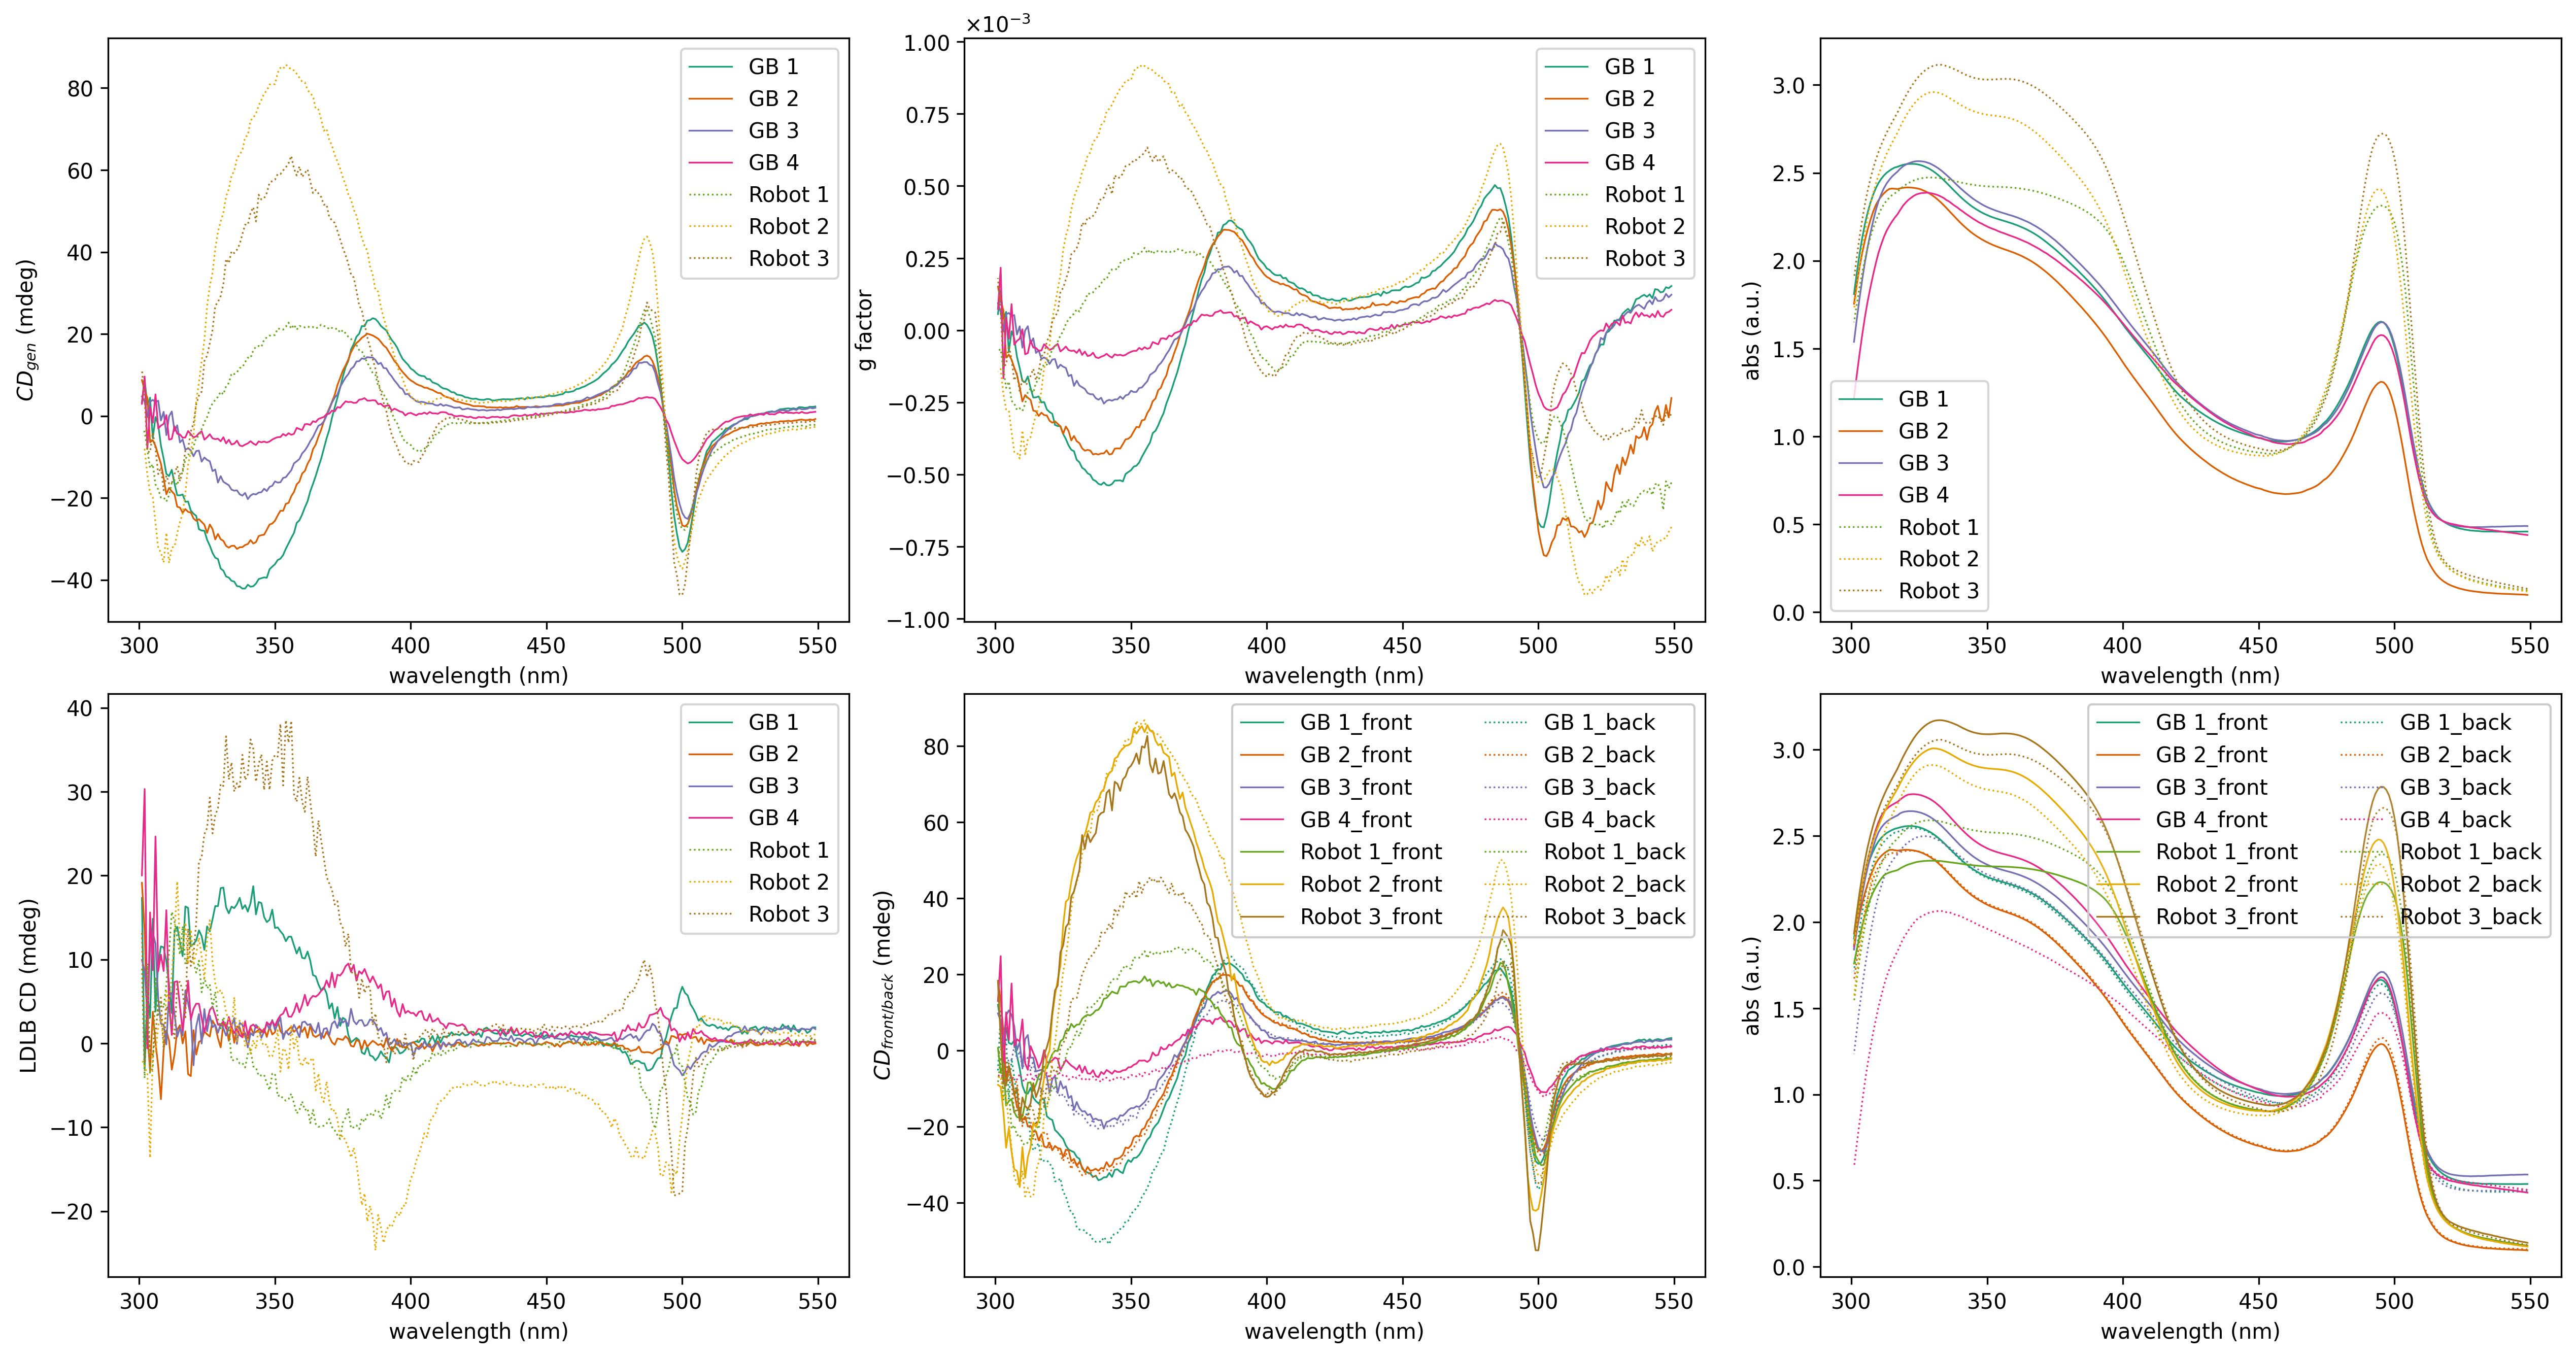

In [6]:
# Set up color cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.colormaps.get_cmap("Dark2").colors)

# fig, ((ax_cd_gen, ax_ldlb), (ax_uv_vis, ax_g_factor), (ax_cd, ax_uv_vis_fb)) = plt.subplots(nrows=2, ncols=3, figsize=(17, 10), dpi=300, layout="tight")
fig, ((ax_cd_gen, ax_g_factor, ax_uv_vis), (ax_ldlb, ax_cd, ax_uv_vis_fb)) = plt.subplots(nrows=2, ncols=3, figsize=(17, 9), dpi=300)

# Plot single-column data using refactored functions
plot_single_column_data(ax_cd_gen, df, "gen_CD_", ylabel="$CD_{gen}$ (mdeg)")
plot_single_column_data(ax_ldlb, df, "ldlb_CD_", ylabel="LDLB CD (mdeg)")
plot_single_column_data(ax_uv_vis, df, "abs_", ylabel="abs (a.u.)")
plot_single_column_data(ax_g_factor, df, "g_factor_", ylabel="g factor", scientific_notation=True)

# Plot front/back paired data using refactored functions
plot_front_back_pairs(ax_cd, df, common_cols, "CD", ylabel="$CD_{front/back}$ (mdeg)")
plot_front_back_pairs(ax_uv_vis_fb, df, common_cols, "abs", ylabel="abs (a.u.)")

# Final layout and save
fig.tight_layout(pad=1.0, w_pad=0.3, h_pad=0.3)
fig.savefig(Path(data_dir, f"{data_dir.stem}.jpg"))


In [3]:
from pathlib import Path
from pprint import pprint

data_dir = Path(r"G:\My Drive\LPS\20250709_S_MeOMBAI_prestudy_2\CD\S_MeOMBAI_2")

txt_files = sorted(list(Path(data_dir).glob('*.txt')))

pprint(txt_files)

[WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/CD/S_MeOMBAI_2/S_MeOMBAI_2_back-1.txt'),
 WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/CD/S_MeOMBAI_2/S_MeOMBAI_2_back-2.txt'),
 WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/CD/S_MeOMBAI_2/S_MeOMBAI_2_back-3.txt'),
 WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/CD/S_MeOMBAI_2/S_MeOMBAI_2_back-4.txt'),
 WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/CD/S_MeOMBAI_2/S_MeOMBAI_2_back-5.txt'),
 WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/CD/S_MeOMBAI_2/S_MeOMBAI_2_back-6.txt'),
 WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/CD/S_MeOMBAI_2/S_MeOMBAI_2_back_2-1.txt'),
 WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/CD/S_MeOMBAI_2/S_MeOMBAI_2_back_2-2.txt'),
 WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/CD/S_MeOMBAI_2/S_MeOMBAI_2_back_2-3.txt'),
 WindowsPath('G:/My Drive/LPS/20250709_S_MeOMBAI_prestudy_2/CD/S_MeOMBAI_2/S_MeOMBAI_

In [15]:
import pandas as pd
import shutil

def rename_file(filename):
    """Create a renamed copy of files from S_MeOMBAI_2_{front|back}_2-{num} to S_MeOMBAI_2_{front|back}-{num+6}."""
    stem = filename.stem
    if "_2-" in stem:
        parts = stem.split("_2-")
        base = parts[0]
        num = int(parts[1])
        new_num = num + 6
        new_stem = f"{base}-{new_num}"
        new_filename = filename.with_stem(new_stem)
        if new_filename.exists():
            print(f"File '{new_filename.name}' already exists. Skipping copy.")
            return new_filename
        
        shutil.copy(filename, new_filename)
        print(f"Copied '{filename.name}' to '{new_filename.name}'")
        
        return new_filename
    return filename

dfs = []
common_cols = set()
for txt_file in txt_files:

    txt_file = rename_file(txt_file)
    
    if "front" in txt_file.stem:
        get_col = lambda col: f"front_{col}_{txt_file.stem.replace('_front', '')}"
    elif "back" in txt_file.stem:
        get_col = lambda col: f"back_{col}_{txt_file.stem.replace('_back', '')}"
    else:
        raise ValueError(f"File {txt_file} does not contain 'front' or 'back' in its name.")
    
    common_cols.add(txt_file.stem.replace("_front", "").replace("_back", ""))
    
    df = pd.read_csv(txt_file, sep=",", names=["wavelength", get_col("CD"), get_col("HT"), get_col("abs")], skiprows=21, nrows=400)
    df = df.set_index("wavelength")
    df = df[df.index < 550]
    # df = df[df.index > 470]
    dfs.append(df)

df = pd.concat(dfs, axis=1)

for common_col in sorted(common_cols):
    df[f"gen_CD_{common_col}"] = (df[f"front_CD_{common_col}"] + df[f"back_CD_{common_col}"]) / 2
    df[f"ldlb_CD_{common_col}"] = df[f"front_CD_{common_col}"] - df[f"back_CD_{common_col}"]
    df[f"abs_{common_col}"] = (df[f"front_abs_{common_col}"] + df[f"back_abs_{common_col}"]) / 2
    df[f"g_factor_{common_col}"] = df[f"gen_CD_{common_col}"] / (df[f"abs_{common_col}"] * 32980)


df.head()

File 'S_MeOMBAI_2_back-7.txt' already exists. Skipping copy.
File 'S_MeOMBAI_2_back-8.txt' already exists. Skipping copy.
File 'S_MeOMBAI_2_back-9.txt' already exists. Skipping copy.
File 'S_MeOMBAI_2_front-7.txt' already exists. Skipping copy.
File 'S_MeOMBAI_2_front-8.txt' already exists. Skipping copy.
File 'S_MeOMBAI_2_front-9.txt' already exists. Skipping copy.


back_CD_S_MeOMBAI_2-1  back_HT_S_MeOMBAI_2-1  \
wavelength                                                 
532.0                  -10.742554             279.226471   
531.0                  -11.180062             278.984863   
530.0                  -11.538380             279.058197   
529.0                  -12.131664             279.029602   
528.0                  -12.711031             279.271332   

            back_abs_S_MeOMBAI_2-1  back_CD_S_MeOMBAI_2-2  \
wavelength                                                  
532.0                     0.164608              -1.753704   
531.0                     0.169132              -1.867461   
530.0                     0.173637              -2.162422   
529.0                     0.179453              -2.333647   
528.0                     0.185204              -2.486597   

            back_HT_S_MeOMBAI_2-2  back_abs_S_MeOMBAI_2-2  \
wavelength                                                  
532.0                  279.646088                0.169278   
531.0                  279.285400                0.172480   
530.0                  279.203461                0.175255   
529.0                  279.003387                0.179160   
528.0                  279.077209                0.183042   

            back_CD_S_MeOMBAI_2-3  back_HT_S_MeOMBAI_2-3  \
wavelength                                                 
532.0                   -2.360753             293.339325   
531.0                   -2.681212             292.927185   
530.0                   -3.034543             292.838837   
529.0                   -3.257369             292.619690   
528.0                   -3.527253             292.648773   

            back_abs_S_MeOMBAI_2-3  back_CD_S_MeOMBAI_2-4  ...  \
wavelength                                                 ...   
532.0                     0.319406              -0.857277  ...   
531.0                     0.322168              -0.958591  ...   
530.0                     0.324900              -1.105539  ...   
529.0                     0.328664              -1.081233  ...   
528.0                     0.332038              -1.052994  ...   

            abs_S_MeOMBAI_2-7  g_factor_S_MeOMBAI_2-7  gen_CD_S_MeOMBAI_2-8  \
wavelength                                                                    
532.0                0.089232               -0.000081              0.160713   
531.0                0.092954               -0.000090              0.019207   
530.0                0.097171               -0.000117              0.068345   
529.0                0.102121               -0.000104              0.001425   
528.0                0.107282               -0.000091              0.036209   

            ldlb_CD_S_MeOMBAI_2-8  abs_S_MeOMBAI_2-8  g_factor_S_MeOMBAI_2-8  \
wavelength                                                                     
532.0                   -0.053522           0.133493            3.650403e-05   
531.0                    0.117421           0.136457            4.267828e-06   
530.0                    0.301561           0.139782            1.482522e-05   
529.0                    0.252763           0.144133            2.998146e-07   
528.0                    0.389704           0.148313            7.402537e-06   

            gen_CD_S_MeOMBAI_2-9  ldlb_CD_S_MeOMBAI_2-9  abs_S_MeOMBAI_2-9  \
wavelength                                                                   
532.0                  -0.609738               0.004332           0.102834   
531.0                  -0.634424               0.175960           0.106819   
530.0                  -0.762704               0.195750           0.111428   
529.0                  -0.808619               0.142347           0.116921   
528.0                  -0.827983               0.273075           0.122447   

            g_factor_S_MeOMBAI_2-9  
wavelength                          
532.0                    -0.000180  
531.0                    -0.000180  
530.0                    -0.000208  
529.

Saved plot to G:\My Drive\LPS\20250709_S_MeOMBAI_prestudy_2\CD\S_MeOMBAI_2\S_MeOMBAI_2.jpg


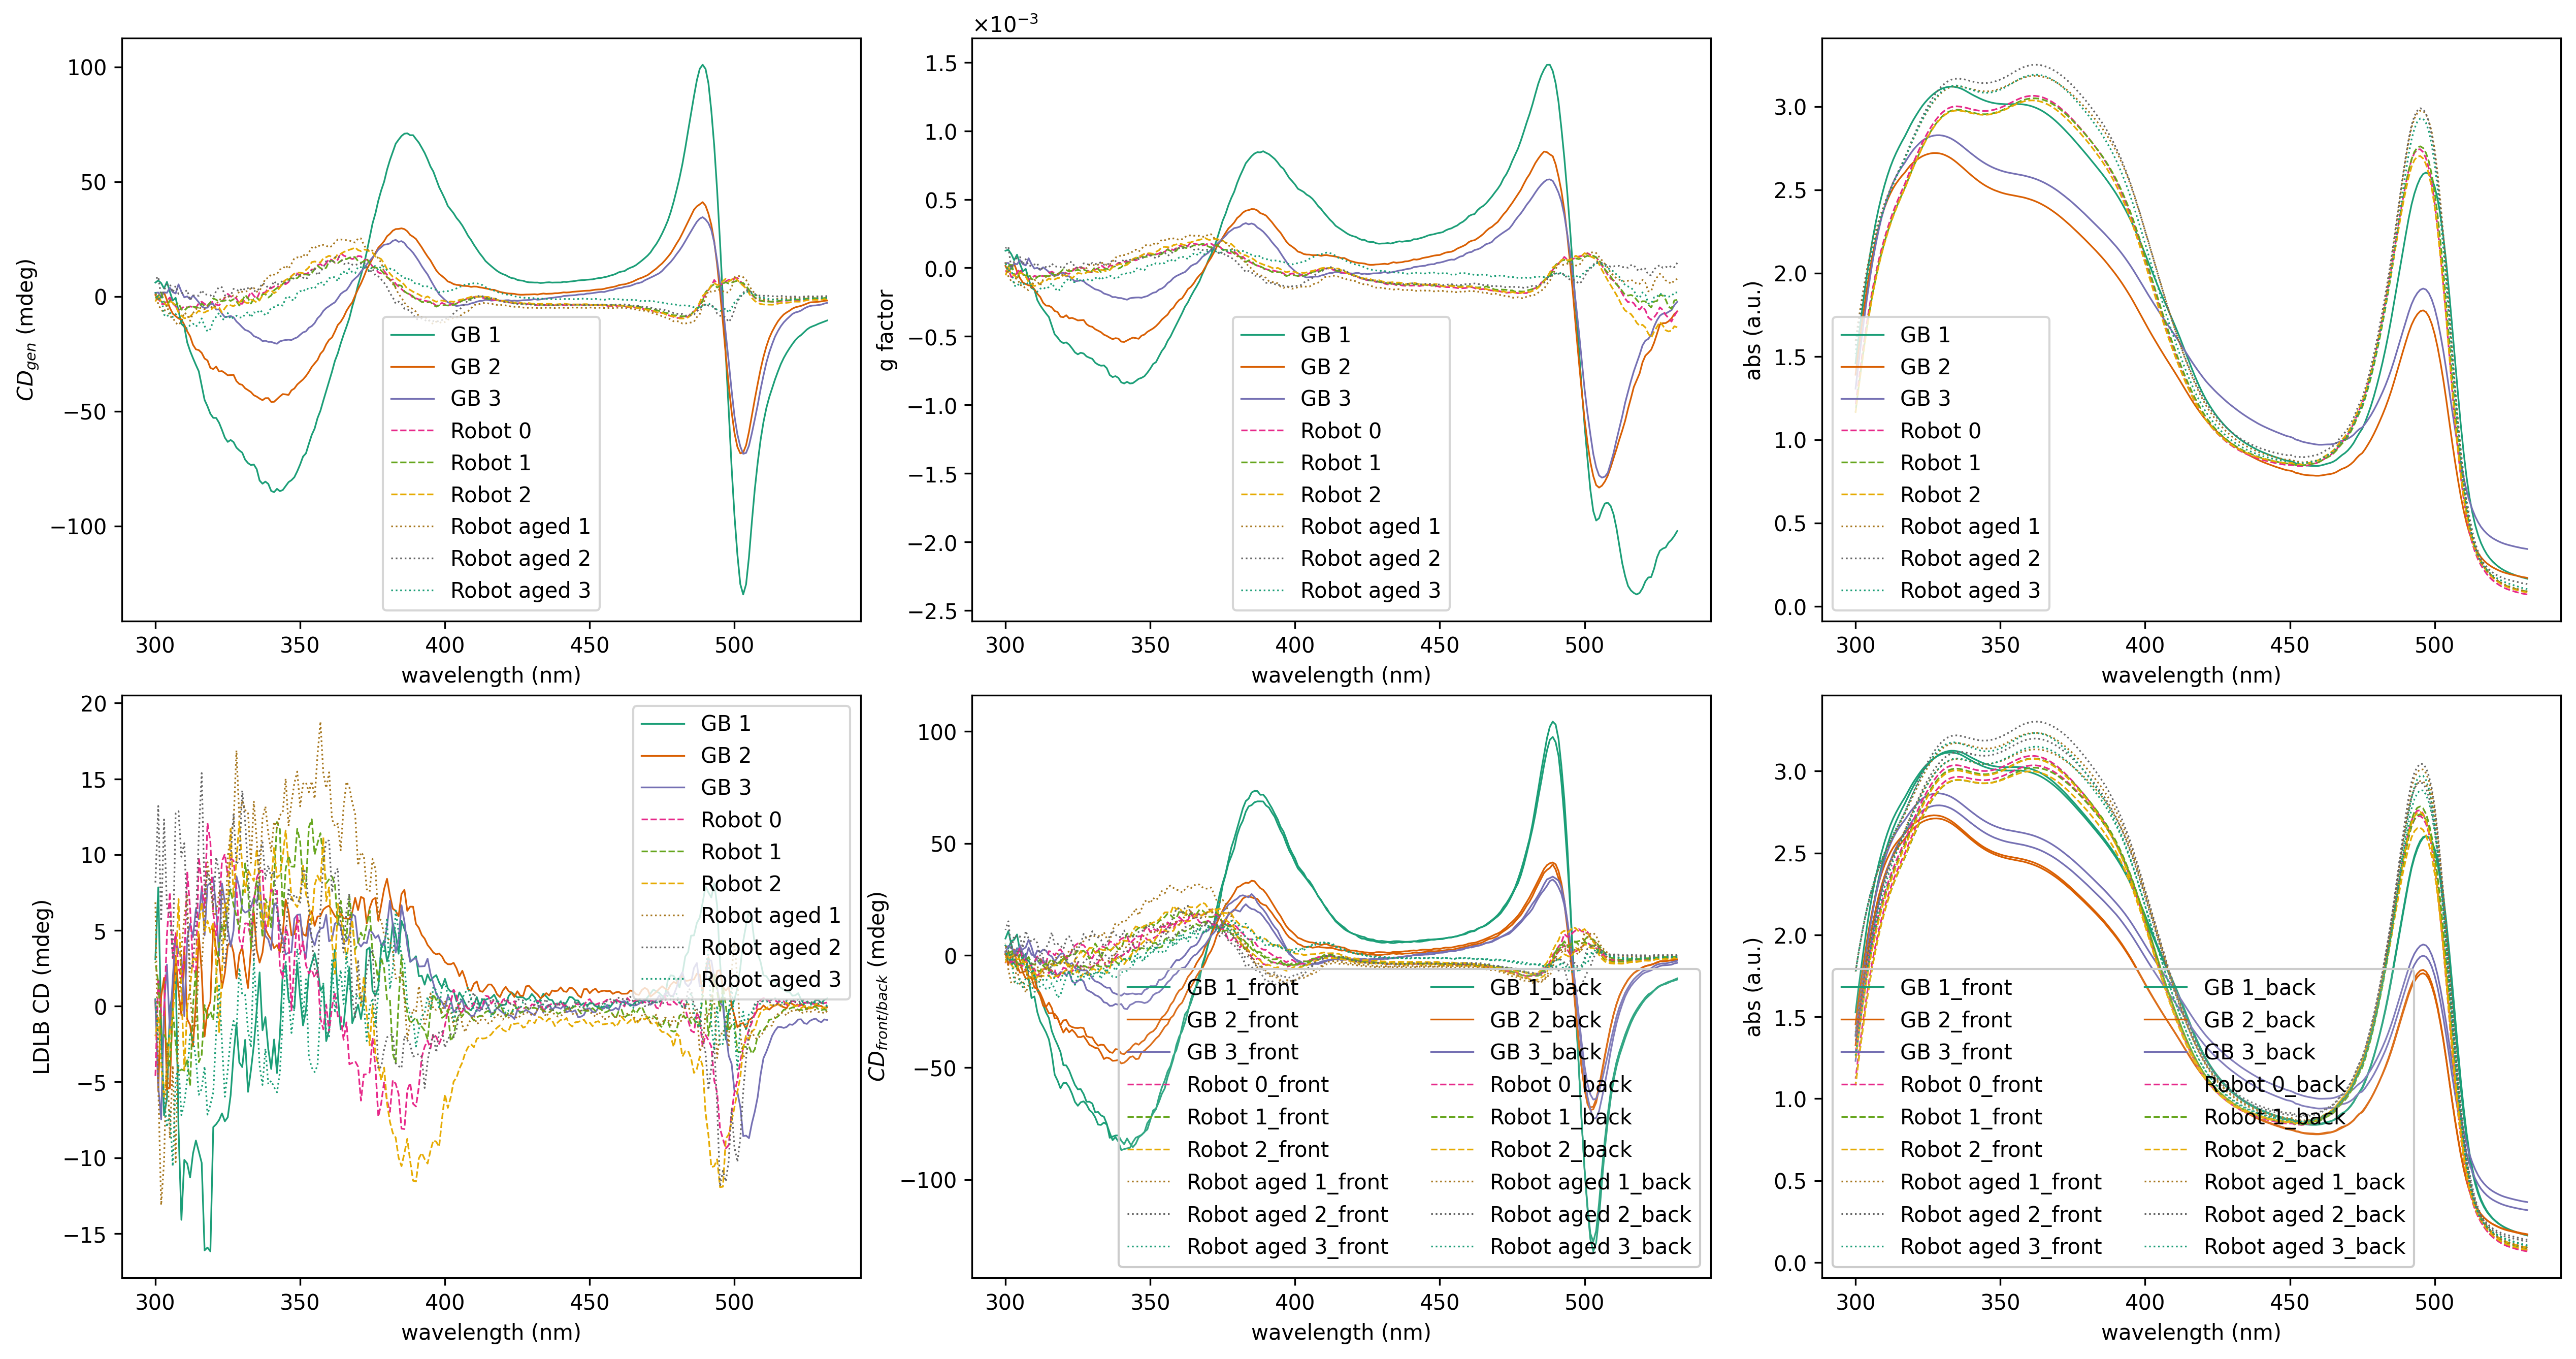

In [14]:
   
def get_label(_name):
    """Extract a clean label from column name."""
    name = _name.replace("CD_", "").replace("HT_", "").replace("abs_", "")

    if name[-1] in ["1", "2", "3"]:
        name = f"GB {name[-1]}"
    
    if name[-1] in ["4", "5", "6"]:
        name = f"Robot {int(name[-1]) - 4}"

    if name[-1] in ["7", "8", "9"]:
        name = f"Robot aged {int(name[-1]) - 6}"
    
    return name

def map_filename_to_linestyle(label):
    if label.startswith("GB"):
        return '-'
    elif label.startswith("Robot aged"):
        return ':'
    else:
        return '--'

# Set up color cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.colormaps.get_cmap("Dark2").colors)

# fig, ((ax_cd_gen, ax_ldlb), (ax_uv_vis, ax_g_factor), (ax_cd, ax_uv_vis_fb)) = plt.subplots(nrows=2, ncols=3, figsize=(17, 10), dpi=300, layout="tight")
fig, ((ax_cd_gen, ax_g_factor, ax_uv_vis), (ax_ldlb, ax_cd, ax_uv_vis_fb)) = plt.subplots(nrows=2, ncols=3, figsize=(17, 9), dpi=300)

# Plot single-column data using refactored functions
plot_single_column_data(ax_cd_gen, df, "gen_CD_", ylabel="$CD_{gen}$ (mdeg)", linestyle_func=map_filename_to_linestyle)
plot_single_column_data(ax_ldlb, df, "ldlb_CD_", ylabel="LDLB CD (mdeg)", linestyle_func=map_filename_to_linestyle)
plot_single_column_data(ax_uv_vis, df, "abs_", ylabel="abs (a.u.)", linestyle_func=map_filename_to_linestyle)
plot_single_column_data(ax_g_factor, df, "g_factor_", ylabel="g factor", scientific_notation=True, linestyle_func=map_filename_to_linestyle)

# Plot front/back paired data using refactored functions
plot_front_back_pairs(ax_cd, df, common_cols, "CD", ylabel="$CD_{front/back}$ (mdeg)", linestyle_func=map_filename_to_linestyle)
plot_front_back_pairs(ax_uv_vis_fb, df, common_cols, "abs", ylabel="abs (a.u.)", linestyle_func=map_filename_to_linestyle)

# Final layout and save
fig.tight_layout(pad=1.0, w_pad=0.3, h_pad=0.3)
fig.savefig(Path(data_dir, f"{data_dir.stem}.jpg"))
print(f"Saved plot to {data_dir / f'{data_dir.stem}.jpg'}")
